# <center> **E-COMMERCE CUSTOMER CHURN**</center>

##Business Problem Understanding

###Context


Customer churn in e-commerce refers to the rate at which customers stop doing business or buying from an online retailer (seller) over a given period of time. Managing and reducing customer churn is essential to maintaining a healthy customer base and ensuring continued revenue.
In This project not only produces an effective predictive model but also provides data-driven strategic guidance that can help companies improve customer retention rates and strengthen their competitive position in the e-commerce market.





###Problem Statement

Customer churn in e-commerce refers to the rate at which customers stop doing business or purchasing with an online retailer (seller) over a given period. Managing and reducing customer churn is essential to maintaining a healthy customer base and ensuring sustainable revenue

Although e-commerce platforms have implemented various marketing and promotional strategies, customer turnover remains a major concern. This suggests the need to identify churn-causing factors and develop predictive models that can help anticipate customers who are likely to stop shopping

##Goals

Create a predictive model that can identify customers who are likely to churn before they actually leave the service.

##Analytic Approach

In general, the analytical approach in machine learning helps e-commerce to understand customer behavior in depth, predict churn risk, and implement appropriate strategies to increase customer loyalty and lifetime value.

## Metric Evaluation

Metric Evaluation

- True Positive (TP): Costumer predicted to churn and actually churn

- False Positive (FP): Costumer predicted to churn, but actually not to churn

- False Negative (FN): Costumer is predicted not to churn, but actually churn

- True Negative (TN): Costumer is predicted not to churn and actually not to churn

##Data Understanding


***

#### **Feature Information**

| **Feature** | **Description** |
| --- | --- |
| **Tenure** | The length of time the user has been subscribed to the service. |
| **WarehouseToHome** | The distance from the warehouse to the user's residence. |
| **NumberOfDeviceRegistered** | The total number of devices registered under a single user account.|
| **PreferedOrderCat** | The product category most frequently ordered by the user in the last 30 days.|
| **SatisfactionScore** | A score representing customer satisfaction with the service. |
| **MaritalStatus** | The marital status of the customer.|
| **NumberOfAddress** | The total number of addresses recorded under a single user account. |
| **Complaint** | The number of complaints submitted by the user in the last 30 days. |
| **DaySinceLastOrder** | The number of days since the customer’s last order. |
| **CashbackAmount** | The average amount of cashback received by the user in the last 30 days. |
| **Churn** | An indicator of whether the user has stopped using the service (1 for churn, 0 for not churn). |

#### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Pembagian & Validasi Data
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_validate, learning_curve, RandomizedSearchCV

# Feature Engineering # Preprocessing Data
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# Metrics
from sklearn.metrics import recall_score, f1_score, classification_report, fbeta_score, make_scorer, roc_auc_score, accuracy_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay

# Model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Imbalance Handling
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, KMeansSMOTE, ADASYN
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
display(df, df.shape)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


(3941, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


The dataset consists of **11 columns**, with **5 numeric** (*float64*) and **6 categorical** (*object*)

In [4]:
df.iloc[0]

,0
Tenure,15.0
WarehouseToHome,29.0
NumberOfDeviceRegistered,4
PreferedOrderCat,Laptop & Accessory
SatisfactionScore,3
MaritalStatus,Single
NumberOfAddress,2
Complain,0
DaySinceLastOrder,7.0
CashbackAmount,143.32


Displays the Value of each column in the first row


##Data Cleaning

**Duplicated Values**

In [5]:
df.duplicated().sum()

np.int64(671)

In [6]:
df = df.drop_duplicates()
# Dataframe shape after deleting
df.shape

(3270, 11)

3270 rows and 11 columns

*Missing Values*

In [7]:
#missing = df.isnull().sum() / len(df) * 100
#print(missing)
df.isna().sum()

,0
Tenure,160
WarehouseToHome,135
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,181
CashbackAmount,0


There are 3 Missing Value columns available on numeric data
> - Tenure  4.892966
> - WarehouseToHome  4.128440
> - DaySinceLastOrder 5.535168

**Check for Unique Value**



In [8]:
print(f'{df.nunique()}')

Tenure                        36
WarehouseToHome               33
NumberOfDeviceRegistered       6
PreferedOrderCat               6
SatisfactionScore              5
MaritalStatus                  3
NumberOfAddress               14
Complain                       2
DaySinceLastOrder             22
CashbackAmount              2335
Churn                          2
dtype: int64


**Check for Outliers**

Lihat Kelas

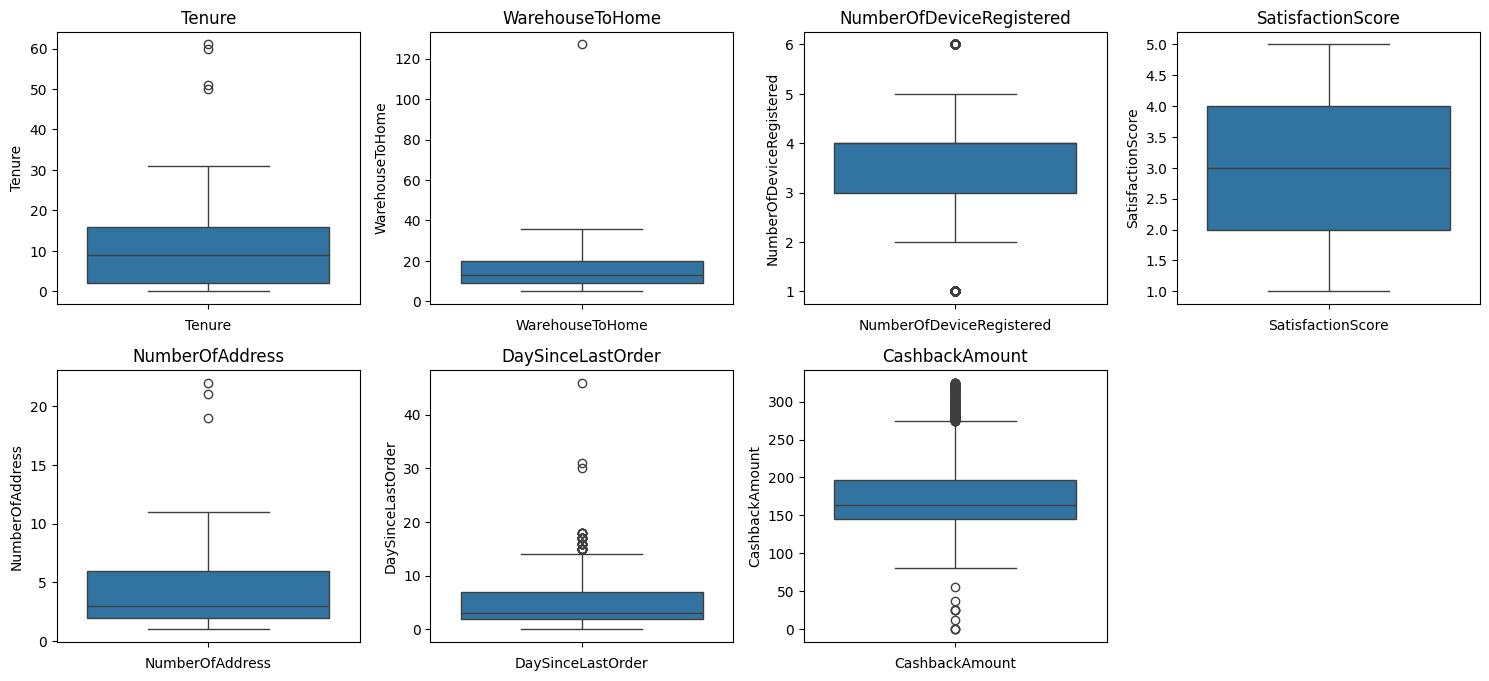

In [9]:
col_names = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount']

plt.figure(figsize=(15, 10))
for i, column in enumerate(col_names, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[column])
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Based on the boxplot, we can observe the presence of outliers in the data. However, since these values ​​are still considered valid and not errors, they are not removed. Instead, they are retained because they can contribute to the model's ability to learn from various data points

**Descriptive Statistics**

In [10]:
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3270,3270
unique,6,3
top,Laptop & Accessory,Married
freq,1213,1686


*Explore Class Distribution*

## **Exploratory Data Analysis**

In [11]:
df['Churn'].value_counts()
#df_1=df['Churn'].value_counts(normalize=True).reset_index()
#df_1

,count
Churn,
0,2736
1,534


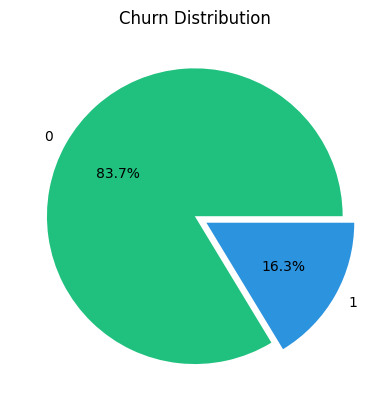

<Figure size 800x500 with 0 Axes>

In [12]:
plt.pie(df['Churn'].value_counts(), labels=['0','1'],autopct='%.1f%%',explode=(0, 0.09),colors=['#20c17f','#2c93df'])
plt.title('Churn Distribution')
plt.figure(figsize=(8, 5))
plt.show()

> 16.3%% : customers no longer use the service product (churn)

> 83.7% : customers continue to use the service product

**Check Distribution Numeric Columns**

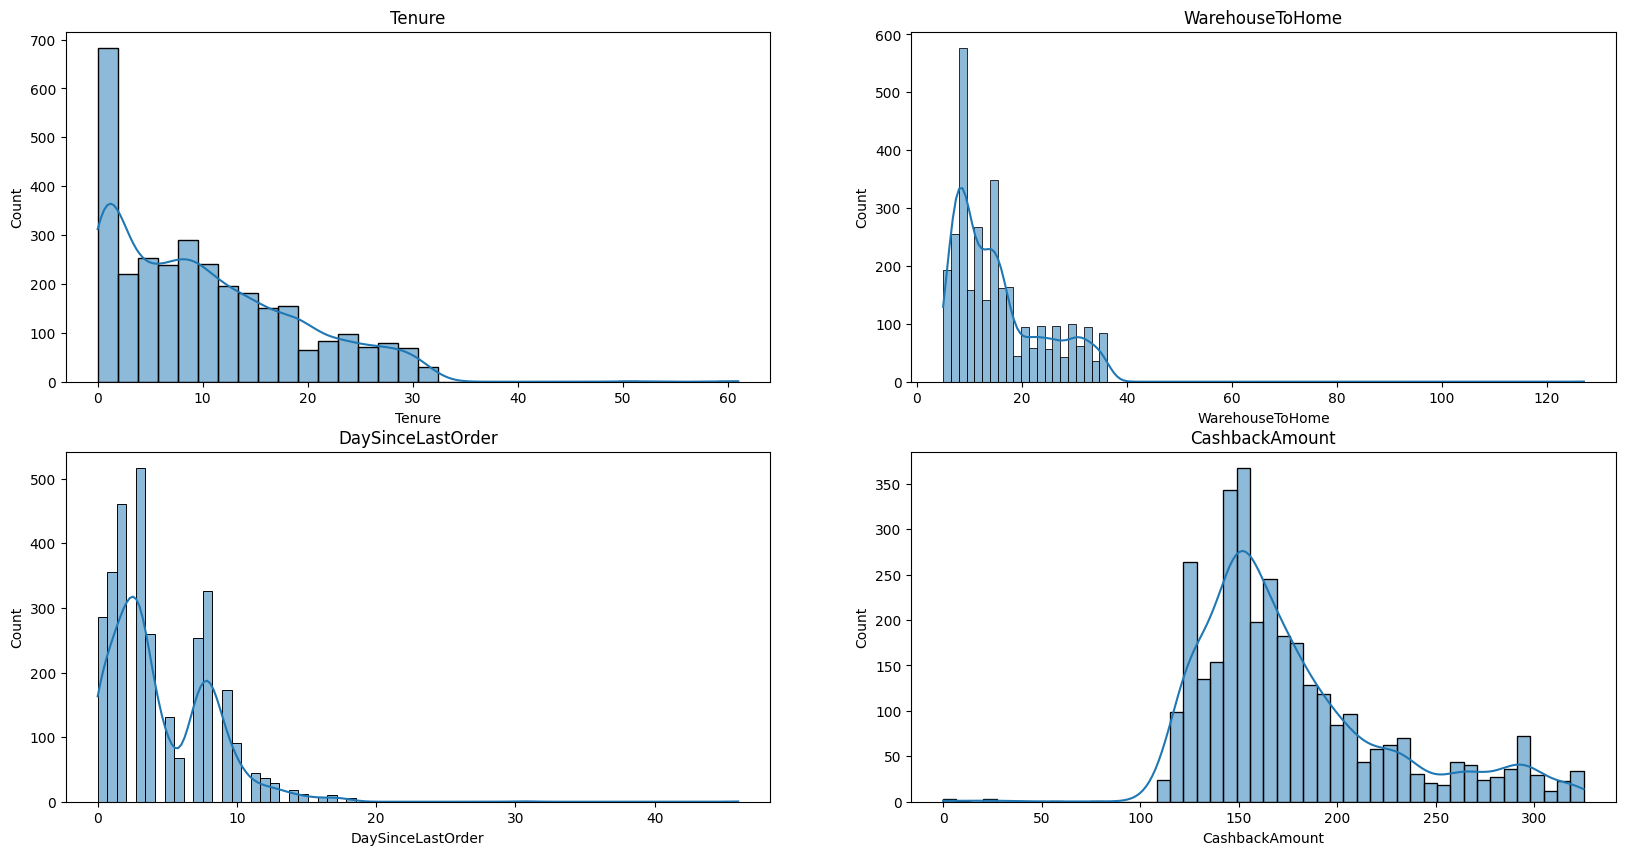

In [13]:
df_num = df[['Tenure','WarehouseToHome','DaySinceLastOrder','CashbackAmount']]
a = 1

plt.figure(figsize=(20,10))
for i in df_num.columns:
    plt.subplot(2,2,a)
    sns.histplot(df_num,x=i,kde=True)
    plt.title(i)
    a = a + 1

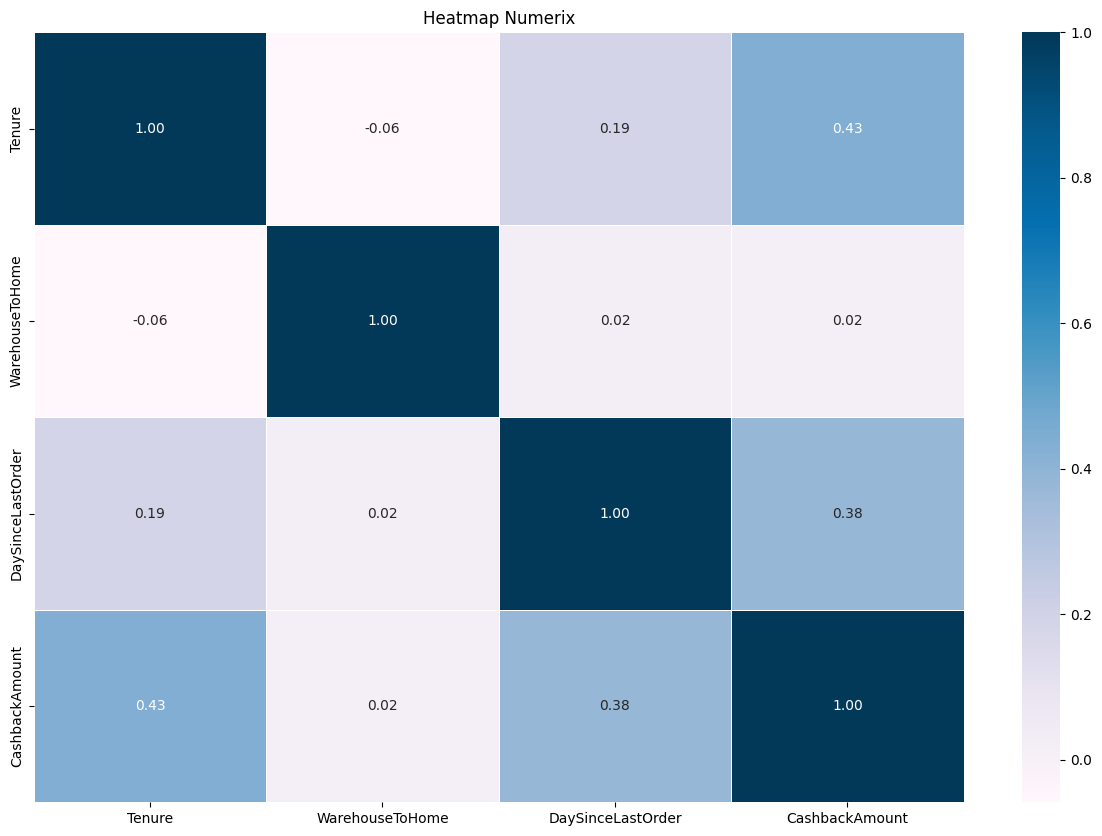

In [14]:
heatmap = df[['Tenure','WarehouseToHome','DaySinceLastOrder','CashbackAmount']]
plt.figure(figsize=(15,10))
sns.heatmap(heatmap.corr(method='spearman'),annot=True, cmap="PuBu", fmt=".2f", linewidths=0.5)
plt.title('Heatmap Numerix')
plt.show()

In [15]:
correlation_matrix = df[['Tenure','WarehouseToHome','DaySinceLastOrder','CashbackAmount']].corr(method='spearman')
correlation_matrix

,Tenure,WarehouseToHome,DaySinceLastOrder,CashbackAmount
Tenure,1.000000,-0.058698,0.192365,0.434410
WarehouseToHome,-0.058698,1.000000,0.024296,0.018722
DaySinceLastOrder,0.192365,0.024296,1.000000,0.377039
CashbackAmount,0.434410,0.018722,0.377039,1.000000


## **Data Preprocessing**

**Define Feature and Target**

In [16]:
# Split data into training and testing sets
X = df.drop(['Churn'],axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Pipeline Transformer**


Some numerical columns (Tenure, WarehouseToHome, DaySinceLastOrder) have missing values.

In [17]:
numerical_features = ['Tenure', 'WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','DaySinceLastOrder', 'CashbackAmount']
categorical_features = ['PreferedOrderCat', 'MaritalStatus']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='median')), # Impute missing values
            ('scaler', RobustScaler()) # Scale numerical features
        ]), numerical_features),
        ('category', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing values for categorical features
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) # One-hot encode categorical features
        ]), categorical_features)
    ],
    remainder='passthrough' # Passthrough any remaining columns
)

**Encoding**

Is an encoding method used in machine learning to convert categorical data into a numeric format so that it can be processed by a machine learning algorithm. This method is usually used when the data has categorical features that do not have a specific order or hierarchy

Unique data columns MaritalStatus and PreferedOrderCat are not classified as nested so we use One Hot Encoding

## **Metric Evaluation**

**Benchmark Model**


Determine the Machine Learning Model or Algorithm that is most suitable for predicting based on the dataset and will be tried several models with the default parameter so that it can be determined which model is best for the dataset

In [18]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
results = []

In [19]:
models = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42),
    AdaBoostClassifier(random_state=42),
]

**Model Evaluation**

In [20]:
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting', 'SVM', 'AdaBoost']

# Prepare lists to store results
roc_auc_scores = []
f2_scores = []
mean_roc_aucs = []
mean_f2s = []
std_roc_aucs = []
std_f2s = []

# Define custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Evaluate each model using StratifiedKFold cross-validation
for model, model_name in zip(models, model_names):
    # Define StratifiedKFold for cross-validation
    skfold = StratifiedKFold(n_splits=5)

    # Create pipeline with preprocessing and model
    estimator = ImbPipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    # Perform cross-validation and calculate ROC AUC and F2 scores
    scores = cross_validate(estimator, X_train, y_train, cv=skfold, scoring={'roc_auc': 'roc_auc', 'f2': f2_scorer})

    # Store the results
    roc_auc_scores.append(scores['test_roc_auc'])
    f2_scores.append(scores['test_f2'])
    mean_roc_aucs.append(scores['test_roc_auc'].mean())
    mean_f2s.append(scores['test_f2'].mean())
    std_roc_aucs.append(scores['test_roc_auc'].std())
    std_f2s.append(scores['test_f2'].std())

# Create DataFrame with evaluation results
results_df_kfold = pd.DataFrame({
    'Model': model_names,
    'Mean ROC AUC': mean_roc_aucs,
    'ROC AUC Std Dev': std_roc_aucs,
    'Mean F2 Score': mean_f2s,
    'F2 Score Std Dev': std_f2s
})

# Sort the results by mean F2 Score in descending order
results_df_sorted_kfold = results_df_kfold.set_index('Model').sort_values(by='Mean F2 Score', ascending=False)

# Display the results
results_df_sorted_kfold

[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163002 -> initscore=-1.636060
[LightGBM] [Info] Start training from score -1.636060
[LightGBM] [Info] Number of positive: 342, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163402 -> initscore=-1.633132
[LightGBM] [

,Mean ROC AUC,ROC AUC Std Dev,Mean F2 Score,F2 Score Std Dev
Model,,,,
LightGBM,0.933609,0.010126,0.652304,0.049315
XGBoost,0.928733,0.008455,0.647198,0.033443
Decision Tree,0.765883,0.019720,0.608367,0.033125
Random Forest,0.926913,0.009395,0.606591,0.030858
Gradient Boosting,0.909643,0.004011,0.582044,0.064211
AdaBoost,0.886105,0.007503,0.546409,0.047912
Logistic Regression,0.868319,0.010232,0.469365,0.035853
SVM,0.876368,0.018525,0.426911,0.036791
KNN,0.812743,0.024884,0.353437,0.033470


In [ ]:
best_model = results_df_sorted_kfold.iloc[0] 

best_model_name = best_model.name
best_model_f2_score = best_model['Mean F2 Score']

print(f"Best Model with F2 Score : {best_model_name} \nwith F2 Score: {best_model_f2_score:.4f}")

Best Model with F2 Score : LightGBM 
with F2 Score: 0.6523


LGBM model has the best F2 score.

In [25]:
# Function to train and evaluate a model
def train_and_evaluate(model, model_name):
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the model on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred)

    # Calculate F2 score
    f2 = fbeta_score(y_test, y_pred, beta=2)

    # Calculate ROC AUC score if applicable
    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = "N/A"  # Some models (e.g., SVM) may not support predict_proba

    print(f"\033[1m\n  >{model_name}< :\n", report)
    print(f"F2 Score\t : {f2}")
    print(f"ROC AUC Score\t : {roc_auc}")

    return model_name, accuracy, report, f2, roc_auc

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'AdaBoost': AdaBoostClassifier(random_state=42),
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    result = train_and_evaluate(model, model_name)
    results.append(result)

# Determine the best model based on F2
best_model_traintest = max(results, key=lambda item: item[3])
best_model_name, best_model_accuracy, best_model_report, best_model_f2, best_model_roc_auc = best_model_traintest

# Print the best model and evaluation results
print(f"\n\nBest Model\t  : {best_model_name}")
print(f"Accuracy\t  : {best_model_accuracy}")
print(f"\n\t\t  >Classification Report<\n{best_model_report}")
print(f"\033[92m F2 Score\t : {best_model_f2}")
print(f"ROC AUC Score\t : {best_model_roc_auc}")

results_df = pd.DataFrame(results)


  >Logistic Regression< :
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       547
           1       0.73      0.53      0.62       107

    accuracy                           0.89       654
   macro avg       0.82      0.75      0.78       654
weighted avg       0.88      0.89      0.88       654

F2 Score	 : 0.5632411067193676
ROC AUC Score	 : 0.9211160279519555

  >K-Nearest Neighbor< :
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       547
           1       0.68      0.41      0.51       107

    accuracy                           0.87       654
   macro avg       0.78      0.69      0.72       654
weighted avg       0.86      0.87      0.86       654

F2 Score	 : 0.4462474645030426
ROC AUC Score	 : 0.8353636658750363

  >Decision Tree< :
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       547
           1       0.59   

The high F2 Score of Light GBM indicates its effectiveness in balancing precision and recall, making it suitable for our application's needs

Since F2 Score emphasizes recall more heavily, Light GBM’s excellent performance suggests it can help minimize missed opportunities in business scenario

### **Resampling**

While Light BGM has shown promising results, the next step is explore Light GBM to compare performance and ensure we select the optimal model.This approach allows us to leverage the strengths of different algorithms, ensuring that our final choice is both accurate and reliable for decision-making



**Light Gradient Boosting Machine**

In [26]:
# Define LGBMClassifier model
lgbm_model = LGBMClassifier(random_state=42, verbose=-100)

# Define resampling methods
resampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}

# Function to evaluate model with resampling
def evaluate_model(resampling_name, resampler):
    # Create pipeline with preprocessing, resampling, and LGBM model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampling', resampler),
        ('model', lgbm_model)
    ])

    # Cross-validation setup
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Custom F2 scorer
    f2_scorer = make_scorer(fbeta_score, beta=2)

    # Perform cross-validation and evaluate using F2-score
    scores = cross_validate(pipeline, X_train, y_train, cv=skfold, scoring={'f2': f2_scorer})

    # Calculate mean F2-score across folds
    mean_f2 = scores['test_f2'].mean()
    std_f2 = scores['test_f2'].std()

    # Fit the model on the full training set and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)
    print(f"\nModel: LGBM with {resampling_name}")
    print(f"Mean F2 Score: {mean_f2:.4f}")
    print(f"F2 Score Std Dev: {std_f2:.4f}")
    print(f"Classification Report:\n{report}")

    return resampling_name, mean_f2, std_f2

# Initialize results list
results = []

# Evaluate each resampling method
for name, resampler in resampling_methods.items():
    result = evaluate_model(name, resampler)
    results.append(result)

# Create DataFrame with evaluation results
results_df_resampling = pd.DataFrame(results, columns=['Resampling Method', 'Mean F2 Score', 'F2 Score Std Dev'])

# Sort the results by F2 Score in descending order
results_df_sorted_resampling = results_df_resampling.sort_values(by='Mean F2 Score', ascending=False)

# Print the comparison of resampling methods
print("\n\033[92mComparison of Resampling Methods:")
print(results_df_sorted_resampling)


Model: LGBM with SMOTE
Mean F2 Score: 0.6838
F2 Score Std Dev: 0.0512
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       547
           1       0.76      0.77      0.76       107

    accuracy                           0.92       654
   macro avg       0.86      0.86      0.86       654
weighted avg       0.92      0.92      0.92       654


Model: LGBM with RandomOverSampler
Mean F2 Score: 0.7519
F2 Score Std Dev: 0.0353
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       547
           1       0.69      0.86      0.77       107

    accuracy                           0.91       654
   macro avg       0.83      0.89      0.86       654
weighted avg       0.93      0.91      0.92       654


Model: LGBM with RandomUnderSampler
Mean F2 Score: 0.7504
F2 Score Std Dev: 0.0397
Classification Report:
              precision    recall  f1-s


LightGBM got the best result from using SMOTEENN oversampling method
Naive Bayes got the best result from using ADASYN oversampling method

### **Hyperparameter Tuning**

To perform Hyperparameter Tuning on LBGM with resampling techniques such as SMOTE, RandomOverSampler, or RandomUnderSampler, it is recommended to use GridSearchCV. This method is more effective in finding the optimal parameter combination through exhaustive search, thus maximizing model performance.

Fitting 5 folds for each of 27 candidates, totalling 135 fits


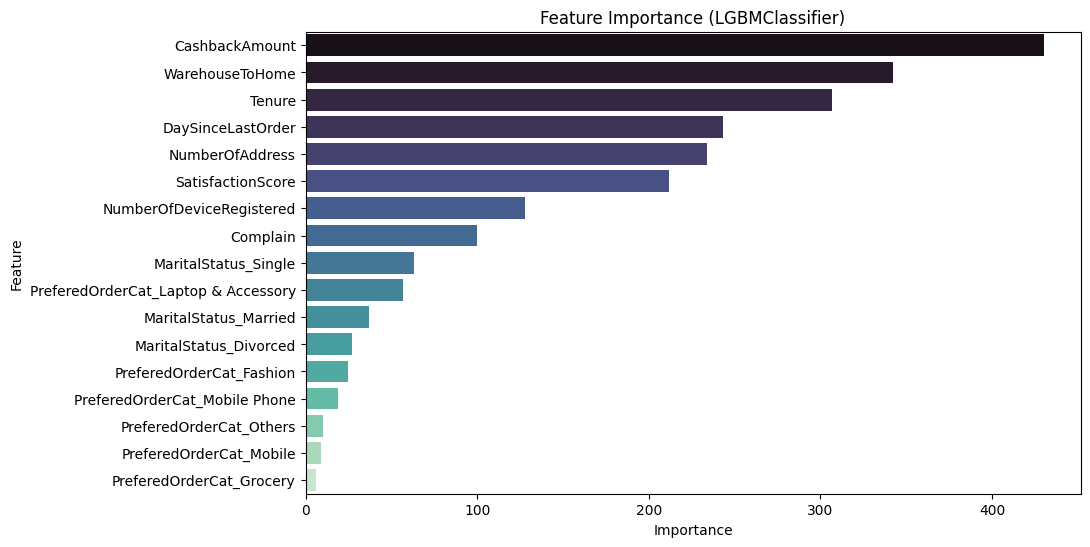

In [27]:
# Define LGBMClassifier model
lgbm_model = LGBMClassifier(random_state=42, verbose=-100)

# Define resampling method (SMOTE in this case)
resampling = SMOTE(random_state=42)

# Create pipeline with preprocessing, resampling, and LGBM model
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampling', resampling),
    ('model', lgbm_model)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__max_depth': [3, 5, 7]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Extract feature importances from the best model
importances = best_model.named_steps['model'].feature_importances_

# Get the feature names from the preprocessor
# Fit the preprocessor to get feature names after transformations
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

# Adjust feature names to remove prefixes if necessary
feature_names = [name.split('__')[-1] for name in feature_names]

# Create a DataFrame to store the feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance (descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='mako')
plt.title('Feature Importance (LGBMClassifier)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

(SatisfactionScore) and (Tenure) are two features with high impact, so companies may want to increase customer satisfaction and retain long-standing customers to prevent churn.

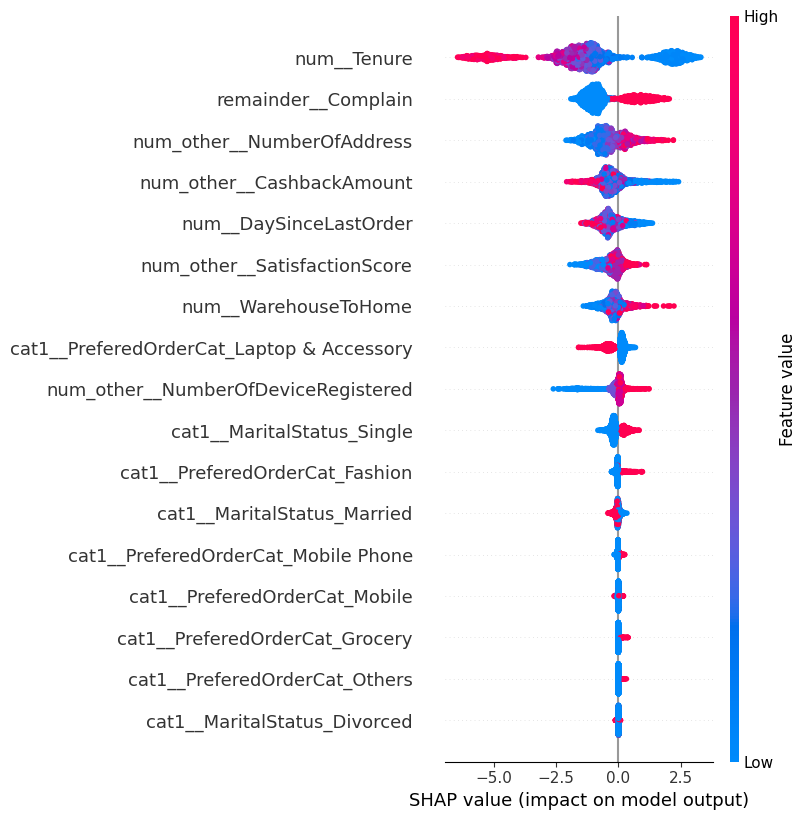

In [30]:
# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(pipeline.named_steps['model'])

# Generate SHAP values for the transformed data
shap_values = explainer.shap_values(X_train_transformed)

# Get feature names from the preprocessor (for the transformed features)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Check if it's binary classification and adjust accordingly
if isinstance(shap_values, list):
    shap_values_class = shap_values[1]  # For binary classification, shap_values[1] corresponds to the positive class
else:
    shap_values_class = shap_values  # If it's a single array, use it directly

# Plot the SHAP summary plot (Dot Plot) in grid layout
shap.summary_plot(shap_values_class, X_train_transformed, plot_type="dot", feature_names=feature_names)
plt.show()


- The LightGBM model is used as the main classifier
- SHAP Summary Plot will show how feature values ​​(such as Tenure, SatisfactionScore) relate to prediction of churn or no churn.
- SHAP values ​​for features that are more influential on the model's decision (a longer Tenure feature tends to lead to a higher prediction of no churn)

---
>## **Conclusion & Recommendation**

###**Conclusion**

**Machine Learning Model to Predict Customer Churn in E-Commerce**

The conclusions that can be drawn from the process of creating a churn prediction model to selecting the **LGBMClassifier** model as the most suitable model. This process involves various stages starting from understanding the data to selecting the best model based on relevant evaluation metrics

Predictions regarding the likelihood of a customer to churn or not when using the services of an e-commerce company can be made through in-depth analysis of customer data and behavior, to help companies identify factors that influence customer loyalty and take strategic steps to increase their satisfaction and retention

1. Understand the Dataset and Preprocessing:
Churn data in the context of e-commerce includes information about customers, transactions, and interactions with the platform that can be used to predict whether a customer will retain or churn.

2. Key features found in the dataset include Tenure, SatisfactionScore, CashbackAmount, DaySinceLastOrder, and NumberOfDeviceRegistered. These features provide important information about customer activity and can be strong indicators of whether a customer is likely to retain or churn.

3. reprocessing was done to handle missing values ​​(using SimpleImputer) and scaling numeric features using RobustScaler. Categorical features such as PreferredOrderCat and MaritalStatus were converted to numeric using OneHotEncoder.

4. Resampling was used to address the class imbalance issue in the dataset, where SMOTE was chosen to increase the number of samples from the minority class (churn) by generating synthetic data.


SMOTE and GridSearchCV improve model performance by addressing class imbalance and selecting the best parameters for the model, which in turn reduces false negatives.



**Churn Prediction Without Using Machine Learning**

- Low Cost: Non-machine learning approaches do not require large investments in infrastructure or software. They can be used at a lower cost, especially for small businesses or startups.

- Immediate Insights: Rules-based approaches provide greater transparency in understanding the reasons behind churn. Managers or business stakeholders can more easily understand why a particular customer is churning, based on clear features

**Churn Prediction Using Machine Learning**

- Feature importance generated by models like LGBMClassifier provides valuable insights into which features most influence churn decisions. This allows companies to adjust their strategies (e.g., increasing customer satisfaction or providing greater incentives to shorter tenured customers)

- Automation and Efficiency: Automated churn prediction using machine learning allows companies to identify customers at risk of churn without manual intervention. This saves time and money in analyzing

Overall, the application of machine learning for churn prediction provides a competitive advantage for e-commerce companies in understanding and managing customer behavior in a more targeted and data-driven manner.

###**Recomendation**

**BUSINESS RECOMMENDATIONS BASED ON E-COMMERCE CHURN PREDICTION**



**1. Implement Churn Prediction Model Automatically**

Use LGBMClassifier to predict customers at risk of churn. With a pre-trained model, companies can automatically identify customers at risk of churn. The model relies on features such as Tenure (length of subscription), SatisfactionScore (satisfaction score), and CashbackAmount (cashback amount) to determine churn prediction.

- Integrate churn models into your customer management (CRM) system to gain real-time insights into who is at risk of churn.

- Use churn predictions to provide special offers or retention incentives to customers who are detected as high risk of churn.


**2. Customers Segment Based on Churn Risk**
- Create targeted marketing campaigns for high-churn risk customers with exclusive offers, discounts, or loyalty programs to prevent them from churning.

- Provide loyalty incentives to low-churn risk customers to retain their loyalty and prevent them from switching to competitors.

**3. Optimize Loyalty and Incentive Programs**
- Offer cashback or special discounts to customers with low tenure and low satisfaction scores.

- Enhance loyalty programs for high tenure customers to strengthen their relationship with the brand and prevent churn

**4. Monitor Changes in Data and Update Models Periodically**
- Update the churn model regularly with the latest data to ensure relevant predictions. Retrain the model with the latest data every few months or when there is a significant change in customer behavior patterns.

- Companies should monitor the performance of the model regularly and re-tune it if necessary to improve model accuracy.